In [4]:
# Data handling and processing
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats
import statsmodels.api as sm
from scipy.stats import randint as sp_randint
from time import time

# NLP
import nltk
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [6]:
# Reading in data
data = pd.read_csv('C:/Users/Suraj S/Downloads/Womens Clothing E-Commerce Reviews.csv')
data = data[['Clothing ID', 'Review Text', 'Recommended IND']]
data.columns = ['EmployeeID', 'Review Text', 'Recommend']

In [7]:
# Inspecting the variables
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EmployeeID   23486 non-null  int64 
 1   Review Text  22641 non-null  object
 2   Recommend    23486 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 550.6+ KB


In [8]:
# Replacing blank variables with 'unknown' ready for processing
data['Review Text'].fillna('unknown', inplace=True)

In [9]:
# Importing SKLearn's list of stopwords and then appending with my own words 
stop = text.ENGLISH_STOP_WORDS

# Basic text cleaning function
def remove_noise(text):
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    
    # Remove special characters
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    
    # Remove numbers
    text = text.str.replace('\d+', '')
    
    # Remove Stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    # Convert to string
    text = text.astype(str)
        
    return text

In [10]:
# Applying noise removal function to data
data['Filtered Review Text'] = remove_noise(data['Review Text'])
data.head()

,EmployeeID,Review Text,Recommend,Filtered Review Text
0,767,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,1080,Love this dress! it's sooo pretty. i happene...,1,love dress sooo pretty happened store im glad ...
2,1077,I had such high hopes for this dress and reall...,0,high hopes dress really wanted work initially ...
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ti...
4,847,This shirt is very flattering to all due to th...,1,shirt flattering adjustable tie perfect length...


In [11]:
# Defining a sentiment analyser function
def sentiment_analyser(text):
    return text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment.polarity))

# Applying function to reviews
data['Polarity'] = sentiment_analyser(data['Filtered Review Text'])
data.head(10)

,EmployeeID,Review Text,Recommend,Filtered Review Text,Polarity
0,767,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable,0.633333
1,1080,Love this dress! it's sooo pretty. i happene...,1,love dress sooo pretty happened store im glad ...,0.318750
2,1077,I had such high hopes for this dress and reall...,0,high hopes dress really wanted work initially ...,0.037400
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ti...,0.500000
4,847,This shirt is very flattering to all due to th...,1,shirt flattering adjustable tie perfect length...,0.750000
5,1080,"I love tracy reese dresses, but this one is no...",0,love tracy reese dresses petite just feet tall...,0.116667
6,858,I aded this in my basket at hte last mintue to...,1,aded basket hte mintue look like person store ...,0.100833
7,858,"I ordered this in carbon for store pick up, an...",1,ordered carbon store pick ton stuff try used p...,0.145513
8,1077,I love this dress. i usually get an xs but it ...,1,love dress usually xs runs little snug bust or...,-0.046875
9,1077,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,im lbs ordered s petite make sure length wasnt...,0.250476


In [14]:
import nltk
nltk.download('wordnet')

# Instantiate the Word tokenizer & Word lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Define a word lemmatizer function
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# Apply the word lemmatizer function to data
data['Filtered Review Text'] = data['Filtered Review Text'].apply(lemmatize_text)
data.head()

[nltk_data] Downloading package wordnet to C:\Users\Suraj
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,EmployeeID,Review Text,Recommend,Filtered Review Text,Polarity
0,767,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]",0.633333
1,1080,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, store, i...",0.318750
2,1077,I had such high hopes for this dress and reall...,0,"[high, hope, dress, really, wanted, work, init...",0.037400
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu...",0.500000
4,847,This shirt is very flattering to all due to th...,1,"[shirt, flattering, adjustable, tie, perfect, ...",0.750000


In [15]:
# Getting a count of words from the documents
# Ngram_range is set to 1,2 - meaning either single or two word combination will be extracted
cvec = CountVectorizer(min_df=.005, max_df=.9, ngram_range=(1,2), tokenizer=lambda doc: doc, lowercase=False)
cvec.fit(data['Filtered Review Text'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(lowercase=False, max_df=0.9, min_df=0.005, ngram_range=(1, 2),
                tokenizer=<function <lambda> at 0x00000201202C8E50>)

In [16]:
# Getting the total n-gram count
len(cvec.vocabulary_)

886

In [17]:
# Creating the bag-of-words representation
cvec_counts = cvec.transform(data['Filtered Review Text'])
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (23486, 886)
nonzero count: 473238
sparsity: 2.27%


In [18]:
# Instantiating the TfidfTransformer
transformer = TfidfTransformer()

# Fitting and transforming n-grams
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<23486x886 sparse matrix of type '<class 'numpy.float64'>'
	with 473238 stored elements in Compressed Sparse Row format>

In [19]:
# Getting a list of all n-grams
transformed_weights = transformed_weights.toarray()
vocab = cvec.get_feature_names()

# Putting weighted n-grams into a DataFrame and computing some summary statistics
model = pd.DataFrame(transformed_weights, columns=vocab)
model['Keyword'] = model.idxmax(axis=1)
model['Max'] = model.max(axis=1)
model['Sum'] = model.drop('Max', axis=1).sum(axis=1)
model.head(10)

,able,absolutely,absolutely love,actually,add,added,addition,adorable,adore,ago,...,year,yellow,yes,yesterday,youre,zip,zipper,Keyword,Max,Sum
0,0.0,0.384864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,silky,0.548067,2.181111
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,bc,0.474526,4.486387
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.178346,0.156682,layer,0.449929,5.224752
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,love love,0.647011,2.700876
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,shirt,0.443253,3.277495
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,dress,0.385539,4.746780
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,trying,0.514505,4.146775
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,went,0.334038,4.852685
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,run little,0.333698,4.099005
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.178684,0.000000,0.000000,s,0.295541,5.907584


In [20]:
# Merging td-idf weight matrix with original DataFrame
model = pd.merge(data, model, left_index=True, right_index=True)

In [21]:
# Printing the first 10 reviews left
model.head(10)

,EmployeeID,Review Text,Recommend,Filtered Review Text,Polarity,able,absolutely,absolutely love,actually,add,...,year,yellow,yes,yesterday,youre,zip,zipper,Keyword,Max,Sum
0,767,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]",0.633333,0.0,0.384864,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,silky,0.548067,2.181111
1,1080,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, store, i...",0.318750,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,bc,0.474526,4.486387
2,1077,I had such high hopes for this dress and reall...,0,"[high, hope, dress, really, wanted, work, init...",0.037400,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.178346,0.156682,layer,0.449929,5.224752
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu...",0.500000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,love love,0.647011,2.700876
4,847,This shirt is very flattering to all due to th...,1,"[shirt, flattering, adjustable, tie, perfect, ...",0.750000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,shirt,0.443253,3.277495
5,1080,"I love tracy reese dresses, but this one is no...",0,"[love, tracy, reese, dress, petite, just, foot...",0.116667,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,dress,0.385539,4.746780
6,858,I aded this in my basket at hte last mintue to...,1,"[aded, basket, hte, mintue, look, like, person...",0.100833,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,trying,0.514505,4.146775
7,858,"I ordered this in carbon for store pick up, an...",1,"[ordered, carbon, store, pick, ton, stuff, try...",0.145513,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,went,0.334038,4.852685
8,1077,I love this dress. i usually get an xs but it ...,1,"[love, dress, usually, x, run, little, snug, b...",-0.046875,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,run little,0.333698,4.099005
9,1077,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[im, lb, ordered, s, petite, make, sure, lengt...",0.250476,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.178684,0.000000,0.000000,s,0.295541,5.907584


In [22]:
# Getting a view of the top 20 occurring words
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Occurrences': occ})
counts_df.sort_values(by='Occurrences', ascending=False).head(25)

,Term,Occurrences
176,dress,11320
237,fit,10096
668,size,9355
443,love,8968
406,like,7018
110,color,6903
430,look,6873
837,wear,6512
291,great,6076
343,im,5988


In [23]:
# Getting a view of the top 20 weights
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Weight': weights})
weights_df.sort_values(by='Weight', ascending=False).head(25)

,Term,Weight
176,dress,0.051224
443,love,0.041398
237,fit,0.040412
668,size,0.038802
804,unknown,0.035979
291,great,0.033325
110,color,0.033161
430,look,0.032320
406,like,0.031847
837,wear,0.030934


1    19314
0     4172
Name: Recommend, dtype: int64


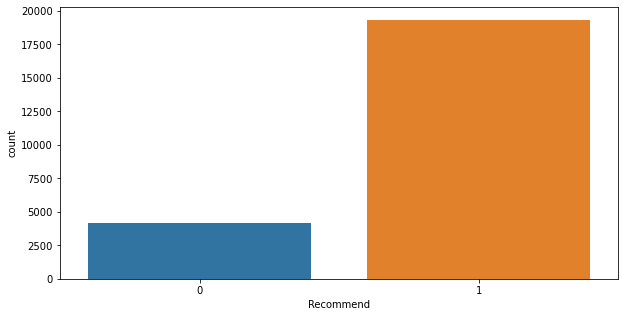

In [24]:
# Plotting overall recommendations and getting value counts
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Recommend', data = model)

print(data['Recommend'].value_counts())

Recommend
0    0.133673
1    0.266691
Name: Polarity, dtype: float64

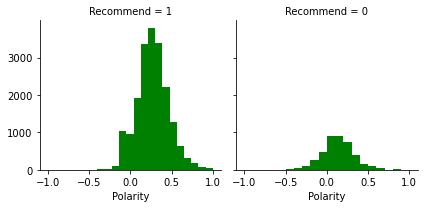

In [25]:
# Visualising polarity between recommending and non-recommending customers, then getting value counts
g = sns.FacetGrid(model, col="Recommend", col_order=[1, 0])
g = g.map(plt.hist, "Polarity", bins=20, color="g")

recommend = model.groupby(['Recommend'])
recommend['Polarity'].mean()

In [26]:
# Get a list of columns for deletion
model.columns

Index(['EmployeeID', 'Review Text', 'Recommend', 'Filtered Review Text',
       'Polarity', 'able', 'absolutely', 'absolutely love', 'actually', 'add',
       ...
       'year', 'yellow', 'yes', 'yesterday', 'youre', 'zip', 'zipper',
       'Keyword', 'Max', 'Sum'],
      dtype='object', length=894)

In [27]:
# Drop all columns not part of the text matrix
ml_model = model.drop(['EmployeeID', 'Review Text', 'Filtered Review Text', 'Polarity', 'Keyword', 'Max', 'Sum'], axis=1)

# Create X & y variables for Machine Learning
X = ml_model.drop('Recommend', axis=1)
y = ml_model['Recommend']

# Create a train-test split of these variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [28]:
# Defining a function to fit and predict ML algorithms
def model(mod, model_name, x_train, y_train, x_test, y_test):
    mod.fit(x_train, y_train)
    print(model_name)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, X_train, y_train, cv = 5)
    print("Accuracy:", round(acc.mean(),3))
    cm = confusion_matrix(predictions, y_train)
    print("Confusion Matrix:  \n", cm)
    print("                    Classification Report \n",classification_report(predictions, y_train))

In [29]:
# 1. Gaussian Naive Bayes
gnb = GaussianNB()
model(gnb, "Gaussian Naive Bayes", X_train, y_train, X_test, y_test)

Gaussian Naive Bayes
Accuracy: 0.726
Confusion Matrix:  
 [[2444 4040]
 [ 470 9486]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.38      0.52      6484
           1       0.70      0.95      0.81      9956

    accuracy                           0.73     16440
   macro avg       0.77      0.66      0.66     16440
weighted avg       0.76      0.73      0.69     16440



In [30]:
# 2. Random Forest Classifier
ran = RandomForestClassifier(n_estimators=50)
model(ran, "Random Forest Classifier", X_train, y_train, X_test, y_test)

Random Forest Classifier
Accuracy: 0.867
Confusion Matrix:  
 [[ 1131   414]
 [ 1783 13112]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.39      0.73      0.51      1545
           1       0.97      0.88      0.92     14895

    accuracy                           0.87     16440
   macro avg       0.68      0.81      0.71     16440
weighted avg       0.91      0.87      0.88     16440



In [31]:
# 3. Logistic Regression
log = LogisticRegression()
model(log, "Logistic Regression", X_train, y_train, X_test, y_test)

Logistic Regression
Accuracy: 0.884
Confusion Matrix:  
 [[ 1429   415]
 [ 1485 13111]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.49      0.77      0.60      1844
           1       0.97      0.90      0.93     14596

    accuracy                           0.88     16440
   macro avg       0.73      0.84      0.77     16440
weighted avg       0.92      0.88      0.90     16440



In [32]:
# 4. Linear SVC
svc = LinearSVC()
model(svc, "Linear SVC", X_train, y_train, X_test, y_test)

Linear SVC
Accuracy: 0.886
Confusion Matrix:  
 [[ 1643   611]
 [ 1271 12915]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.56      0.73      0.64      2254
           1       0.95      0.91      0.93     14186

    accuracy                           0.89     16440
   macro avg       0.76      0.82      0.78     16440
weighted avg       0.90      0.89      0.89     16440



In [33]:

#algorithm 2
# Import the hopeful solution to our problems
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [34]:
# Setting up new variables for ML
X_sm, y_sm = smote.fit_sample(X,y)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [35]:
# Defining a new function with revised inputs for the new SMOTE variables
def model_sm(mod, model_name, x_train_sm, y_train_sm, x_test_sm, y_test_sm):
    mod.fit(x_train_sm, y_train_sm)
    print(model_name)
    acc = cross_val_score(mod, X_train_sm, y_train_sm, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, X_train_sm, y_train_sm, cv = 5)
    print("Accuracy:", round(acc.mean(),3))
    cm = confusion_matrix(predictions, y_train_sm)
    print("Confusion Matrix:  \n", cm)
    print("                    Classification Report \n",classification_report(predictions, y_train_sm))

In [36]:
# 1. Gaussian Naive Bayes
gnb = GaussianNB()
model_sm(gnb, "Gaussian Naive Bayes", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

Gaussian Naive Bayes
Accuracy: 0.838
Confusion Matrix:  
 [[11718  2558]
 [ 1831 10932]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84     14276
           1       0.81      0.86      0.83     12763

    accuracy                           0.84     27039
   macro avg       0.84      0.84      0.84     27039
weighted avg       0.84      0.84      0.84     27039



In [37]:
# 2. Random Forest Classifier
ran = RandomForestClassifier(n_estimators=50)
model_sm(ran, "Random Forest Classifier", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

Random Forest Classifier
Accuracy: 0.914
Confusion Matrix:  
 [[12391  1154]
 [ 1158 12336]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     13545
           1       0.91      0.91      0.91     13494

    accuracy                           0.91     27039
   macro avg       0.91      0.91      0.91     27039
weighted avg       0.91      0.91      0.91     27039



In [38]:
# 3. Logistic Regression
log = LogisticRegression()
model_sm(log, "Logistic Regression", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

Logistic Regression
Accuracy: 0.882
Confusion Matrix:  
 [[12052  1689]
 [ 1497 11801]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     13741
           1       0.87      0.89      0.88     13298

    accuracy                           0.88     27039
   macro avg       0.88      0.88      0.88     27039
weighted avg       0.88      0.88      0.88     27039



In [39]:
# 4. Linear SVC
svc = LinearSVC()
model_sm(svc, "Linear SVC", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

Linear SVC
Accuracy: 0.883
Confusion Matrix:  
 [[12059  1670]
 [ 1490 11820]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     13729
           1       0.88      0.89      0.88     13310

    accuracy                           0.88     27039
   macro avg       0.88      0.88      0.88     27039
weighted avg       0.88      0.88      0.88     27039



In [40]:
# Creating a plot for feature importance
def importance_plotting(data,x,y,palette,title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data,y_vars=y,x_vars=x,size=5,aspect=1)
    ft.map(sns.stripplot,orient='h',palette=palette, edgecolor="black",size=15)
    for ax, title in zip(ft.axes.flat, titles):
        
    # Set a different title for each axes
        ax.set(title=title)
        
    # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


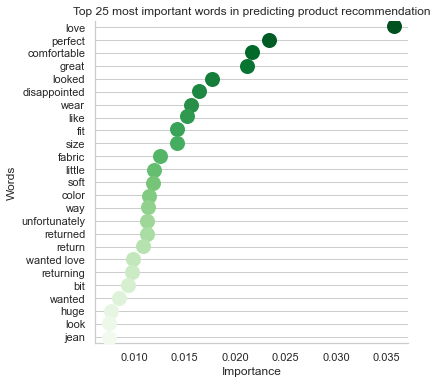

In [41]:
# Compile arrays of columns (words) and feature importances
fi = {'Words':ml_model.drop('Recommend',axis=1).columns.tolist(),'Importance':ran.feature_importances_}

# Bung these into a dataframe, rank highest to lowest then slice top 20
Importance = pd.DataFrame(fi,index=None).sort_values('Importance',ascending=False).head(25)

# Plot the graph!
titles = ["Top 25 most important words in predicting product recommendation"]
importance_plotting(Importance,'Importance','Words','Greens_r',titles)